## 📌 Presentación en PDF 

✅ Link de google drive: https://drive.google.com/file/d/1-l-Y2rzk8ck7KRwueDZei4or2aMRejRn/view?usp=drive_link

## 📌 Acceso a Tableau

✅ Link a Tableau: https://public.tableau.com/app/profile/dilcia.barrios/viz/Proyecto-Final_17415502953220/CallMeMaybe?publish=yes

## 📌 Lista de fuentes

✅https://codificandobits.com/blog/manejo-de-valores-extremos-outliers/

✅https://www.datacamp.com/es/tutorial/chi-square-test-r

✅https://www.questionpro.com/blog/es/prueba-u-de-mann-whitney/

✅https://www.clubbenchmarking.com/quartiles

✅https://es.wikipedia.org/wiki/Tabla_de_contingencia

# Servicio de telefonía virtual CallMeMaybe 

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores con oportunidades de mejora (bajo desempeño). Se considera que un operador con bajo desempeño, si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de bajo desempeño.

## 📌**Objetivo**

- Identificar operadores con oportunidades de mejora en el servicio de telefonía virtual CallMeMaybe.
  
## **Etapas del Proyecto**

### 📌1. **Preprocesamiento de Datos**

Objetivo: Cargar, limpiar y preparar los datos para el análisis.

- Estudiar valores ausentes.
- Estudiar valores duplicados.
- Comprobar la exactitud de los nombres de columnas.
- Reemplazar valores ausentes.
- Convertir las fechas y horas de las llamadas a un formato adecuado para el análisis.

### 📌2. **Análisis Exploratorio de Datos (EDA)**

Objetivo: Entender la distribución de las llamadas y detectar posibles problemas.
    
- Distribución de llamadas por tipo.
- Cantidad de llamadas perdidas.
- Análisis de tiempos de espera.
    
### 📌3. **Identificación de Operadores con Oportunidades de Mejora**

Objetivo: Determinar qué operadores tienen un rendiemiento bajo de desempeño.

- Tasa de llamadas perdidas.
- Tiempo de espera promedio. 
- Cantidad de llamadas salientes realizadas.

***Operadores con oportunidades de mejora:***

1. Tasa de llamadas perdidas > percentil 75.
2. Tiempo de espera promedio > percentil 75.
    
***Operadores con un alto ranking de productividad:***

1. Tasa de llamadas perdidas < percentil 25.
2. Tiempo de espera promedio < percentil 25.


### 📌4.**Hipótesis a Evaluar**

Objetivo: Validar si las diferencias entre operadores con oportunidades de mejoras y operadores con un alto ranking, son estadísticamente significativas.
 
- Comparación de tiempos de espera:
        Prueba de Mann-Whitney, para evaluar operadores con oportunidades de mejora vs operadores con un alto ranking de productividad.
    
- Comparación de llamadas perdidas:
        Prueba de chi-cuadrado para analizar si las llamadas perdidas es significativamente diferente. Extraer llamadas de ambos grupos: Operadores con oportunidades de mejora vs Operadores con un alto ranking de productividad.


### 5.📌**Otros Gráficos a Realizar (Dashboard)**

1. Trazar un histograma para la duración de la llamada.
2. Trazar un gráfico circular que muestre la participación de las llamadas internas y externa.


### 6.📌**Conclusiones y Recomendaciones**

- Resumen de los hallazgos más importantes.
- Sugerencias para la toma de decisiones.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import datetime as dt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu


In [2]:
# Leer los archivos CSV y asignarles nombres

data = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-14/telecom_dataset_us.csv') 
clientes = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-14/telecom_clients_us.csv') 

# 📌 1. **Preprocesamiento de Datos**

In [3]:
display(data)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [4]:
# Contar cantidad de duplicados
data.duplicated(['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call','calls_count','call_duration','total_call_duration']).sum()


np.int64(4900)

In [5]:
display(clientes)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [7]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [8]:
# Verificar valores ausentes
display(data.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

**Comentario:** En el caso de internal ya que represanta la cantidad de nulos menos de 1% los eliminaremos. Para el caso de los operator_id ya que represanta un 15% de mis datos, se rellenará con 0, (asignaremos a operadores desconocido).

In [9]:
# Rellenar ausentes 
data_clean = data.copy()
data_clean['operator_id'] = data_clean['operator_id'].fillna(-1)

In [10]:
# Eliminando ausentes del campo internal
data_clean = data_clean.dropna(subset=['internal'])

In [11]:
# Verificando valores ausentes nuevamente
display(data_clean.isnull().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [12]:
# Evaluando duplicados

print(data_clean.duplicated().sum())

4893


In [13]:
data_clean[data_clean.duplicated()]


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,-1.0,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,-1.0,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,-1.0,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


**Nota:** Hay registros con in y out, lo que sugiere que representa acciones diferentes en sistema. No se eliminara duplicados
ya que estos forma parte del proceso natural de datos.

In [14]:
# Verificar valores ausentes de clientes
display(clientes.isnull().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [15]:
# Evaluando duplicados
print(clientes.duplicated().sum())

0


In [16]:
# Convertir a Datetime los campos de fecha
data['date']=  pd.to_datetime(data['date'])
clientes['date_start']=  pd.to_datetime(data['date'])

In [17]:
# Realizar la unión con INNER JOIN con 'user_id' (solo los que tienen coincidencia en ambos dataframe)
merged_data = pd.merge(data_clean, clientes, on='user_id', how='inner')
display(merged_data)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,-1.0,True,2,0,4,B,2019-11-05 00:00:00+03:00
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-11-05 00:00:00+03:00
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-11-05 00:00:00+03:00
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-11-05 00:00:00+03:00
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-11-05 00:00:00+03:00
...,...,...,...,...,...,...,...,...,...,...,...
53780,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,C,2019-09-02 00:00:00+03:00
53781,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,C,2019-09-02 00:00:00+03:00
53782,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-09-02 00:00:00+03:00
53783,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-09-02 00:00:00+03:00


In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53785 non-null  int64                    
 1   date                 53785 non-null  object                   
 2   direction            53785 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53785 non-null  float64                  
 5   is_missed_call       53785 non-null  bool                     
 6   calls_count          53785 non-null  int64                    
 7   call_duration        53785 non-null  int64                    
 8   total_call_duration  53785 non-null  int64                    
 9   tariff_plan          53785 non-null  object                   
 10  date_start           53785 non-null  datetime64[ns, UTC+03:00]
dtypes:

In [43]:
print(merged_data["direction"] == "in")

0         True
1        False
2        False
3        False
4        False
         ...  
53780    False
53781    False
53782    False
53783    False
53784     True
Name: direction, Length: 53785, dtype: bool


In [19]:
# Descargar mi archivo limpio 

merged_data.to_csv('merged_data.csv', index=False, encoding='utf-8')

# Para ver donde se guardo

import os

print(os.getcwd())

/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-14


# 📌 2. Análisis Exploratorio de Datos (EDA)

### 📍 Distribución de llamadas por tipo (direction = in/out)

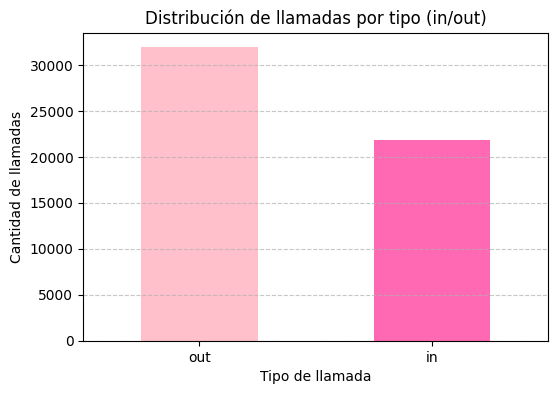

direction
out    31915
in     21870
Name: count, dtype: int64

In [20]:
# Contar la cantidad de llamadas por tipo de dirección (in / out)
call_direction_counts = merged_data['direction'].value_counts()

# Visualización de la distribución de llamadas por tipo
plt.figure(figsize=(6,4))
call_direction_counts.plot(kind='bar', color=['pink', 'hotpink'])
plt.title('Distribución de llamadas por tipo (in/out)')
plt.xlabel('Tipo de llamada')
plt.ylabel('Cantidad de llamadas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar los valores de la distribución
call_direction_counts


### 📌 **Observaciones:**

- Total de llamadas salientes: 31915
- Total de llamadas entrantes: 21870

### 📍 Cantidad de llamadas perdidas (is_missed_call).

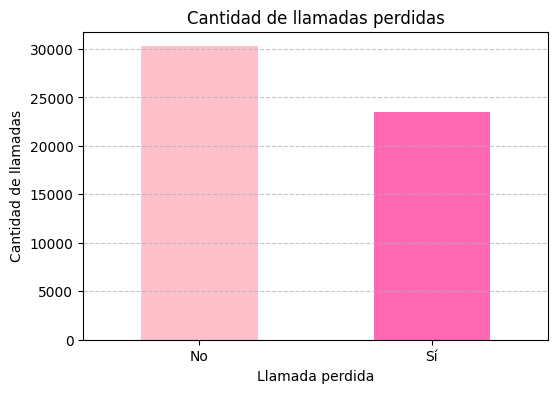

is_missed_call
False    30275
True     23510
Name: count, dtype: int64

In [21]:
# Contar la cantidad de llamadas perdidas y no perdidas
missed_calls_counts = merged_data['is_missed_call'].value_counts()

# Visualización de la cantidad de llamadas perdidas
plt.figure(figsize=(6,4))
missed_calls_counts.plot(kind='bar', color=['pink', 'hotpink'])
plt.title('Cantidad de llamadas perdidas')
plt.xlabel('Llamada perdida')
plt.ylabel('Cantidad de llamadas')
plt.xticks(ticks=[0,1], labels=['No', 'Sí'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar los valores de la distribución
missed_calls_counts


### 📌 **Observaciones:**

- Es menor el total de llamadas perdidas 23510 en comparación a las no perdidas, la diferencia es de un 22.35%.

### 📍 Análisis de tiempos de espera

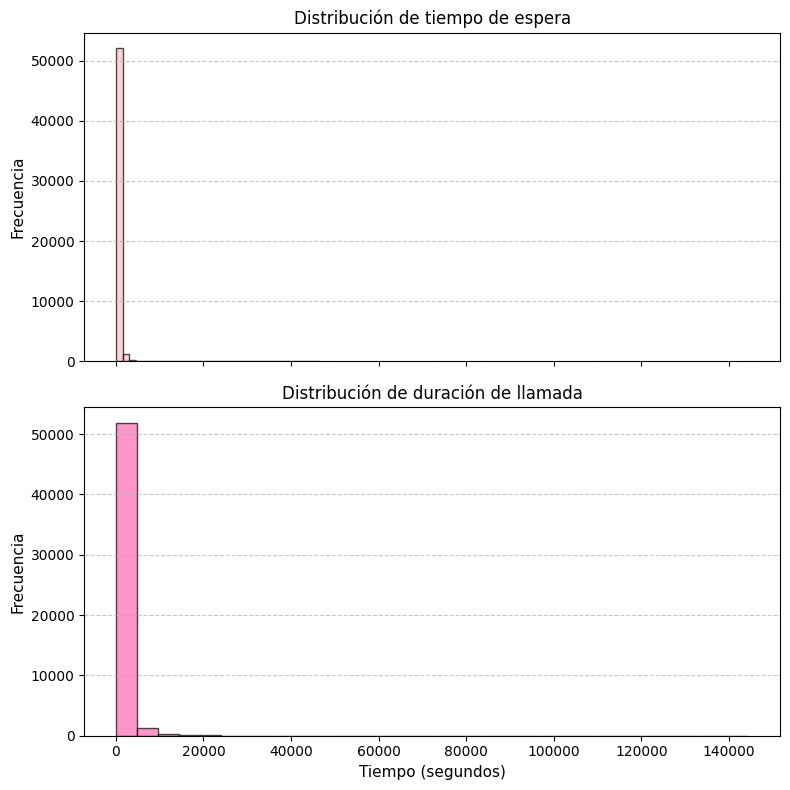

In [22]:
# Crear una nueva columna de tiempo de espera (diferencia entre total y duración real)
merged_data['wait_time'] = merged_data['total_call_duration'] - merged_data['call_duration']

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Histograma de tiempo de espera
axes[0].hist(merged_data['wait_time'], bins=30, color='pink', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de tiempo de espera', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma de duración de llamada
axes[1].hist(merged_data['call_duration'], bins=30, color='hotpink', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución de duración de llamada', fontsize=12)
axes[1].set_xlabel('Tiempo (segundos)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 📌 **Observaciones:**

- Los gráficos indican que hay valores extremadamente grandes y pequeños en "tiempo de espera" y "duración de la llamada", lo que causa que la mayoría de los datos queden comprimidos en un solo lado del histograma (cercano a cero).
- La escala del eje X está afectando la visualización, ya que los valores extremos hacen que todo lo demás parezca muy pequeño.
- Posible valores atipicos.

### 📍 Analizando valores atípicos

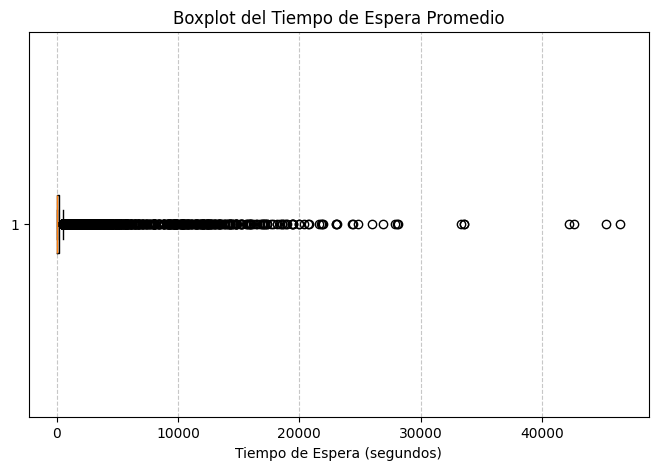

In [23]:
# Crear un boxplot para el tiempo de espera
plt.figure(figsize=(8, 5))
plt.boxplot(merged_data['wait_time'], vert=False)
plt.xlabel('Tiempo de Espera (segundos)')
plt.title('Boxplot del Tiempo de Espera Promedio')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

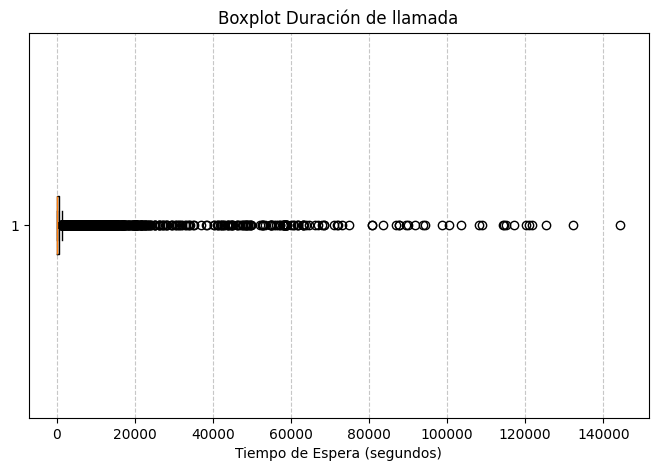

In [24]:
# Crear un boxplot para la duración de llamada
plt.figure(figsize=(8, 5))
plt.boxplot(merged_data['call_duration'], vert=False)
plt.xlabel('Tiempo de Espera (segundos)')
plt.title('Boxplot Duración de llamada')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### 📌 **Observaciones:**

El boxplot muestra claramente que existen valores atípicos (outliers) en ambas variables:

Tiempo de espera (wait_time):
- La mayoría de los valores están cerca de 0, pero hay un gran número de valores atípicos por encima de 20,000 segundos.

Duración de la llamada (call_duration):
- También tiene valores extremos, algunos por encima de 80,000, alcanzando valores hasta 140,000 segundos.

In [25]:
# Estadísticas descriptivas para cada tipo de duración
wait_time_stats = merged_data[['call_duration', 'total_call_duration', 'wait_time']].describe()

# Mostrar estadísticas descriptivas
wait_time_stats

,call_duration,total_call_duration,wait_time
count,53785.000000,53785.000000,53785.000000
mean,868.436162,1159.476174,291.040011
std,3735.653323,4407.963966,1129.059868
min,0.000000,0.000000,0.000000
25%,0.000000,47.000000,17.000000
50%,38.000000,211.000000,55.000000
75%,574.000000,905.000000,202.000000
max,144395.000000,166155.000000,46474.000000


### 📌 **Observaciones estadisticas descriptivas:**

- Observamos que call_duration tiene una media de 868.4 segundos, pero con una desviación estándar muy alta (3735.65 segundos), lo que sugiere la presencia de valores atípicos extremadamente altos. El máximo es 144,395 segundos, lo cual parece anómalo para una llamada.

- Observamos tambien que en total_call_duration sigue un patrón similar, con una media de 1159.47 segundos y una desviación estándar de 4407.96 segundos. El valor máximo es 166,155 segundos, lo que refuerza la hipótesis de valores atípicos.

- El percentil 75 es significativamente alto en todas las variables, lo que indica que una minoría de llamadas presentan tiempos excesivos en comparación con la mayoría.


### 📌 **Observaciones finales sobre el manejo de valores atípicos**

- Si consideramos que nuestros datos provienen de una fuente legítima, y dado que en el estudio que estamos realizando se esta analizando el comportamiento de los operadores, y los valores extremos contienen información importante (duración de llamadas y tiempos de esperas), que resultan esenciales para entender el comportamiento de los datos y para fases posteriores del proyecto.

- Preservamores y usaremos como herramienta en la toma de decisiones en el proyecto.

# 📌 3. Identificación de Operadores con Oportunidades de Mejora

#### 📍Tasa de llamadas perdidas
#### 📍Tiempo de espera promedio
#### 📍Cantidad de llamadas salientes realizadas

In [26]:
# Agrupar por operador y calcular las métricas clave

operator_performance = merged_data.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', 'sum'),
    avg_wait_time=('total_call_duration', 'mean'),
    total_call_duration=('total_call_duration', 'sum'),
    in_calls=('direction', lambda x: (x == 'in').sum()),
    out_calls=('direction', lambda x: (x == 'out').sum())
    
).reset_index()

# Calcular la tasa de llamadas perdidas
operator_performance['missed_calls_ratio'] = (operator_performance['missed_calls'] / operator_performance['total_calls']) * 100

# Mostrar los resultados
display(operator_performance)


,operator_id,total_calls,missed_calls,avg_wait_time,total_call_duration,in_calls,out_calls,missed_calls_ratio
0,-1.0,113547,7993,235.266051,1909184,7917,198,7.039376
1,879896.0,1131,50,761.148438,97427,23,105,4.420866
2,879898.0,7973,100,1567.364000,391841,63,187,1.254233
3,880020.0,54,7,119.272727,2624,8,14,12.962963
4,880022.0,219,33,298.407895,22679,8,68,15.068493
...,...,...,...,...,...,...,...,...
1088,972410.0,77,2,1318.750000,5275,0,4,2.597403
1089,972412.0,61,2,909.600000,4548,1,4,3.278689
1090,972460.0,70,3,346.888889,3122,2,7,4.285714
1091,973120.0,3,1,12.500000,25,0,2,33.333333


In [27]:
# Filtrar solo llamadas salientes y calcular la cantidad de llamadas salientes realizadas por operador
outgoing_calls_per_operator = merged_data[merged_data['direction'] == 'out'].groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls_per_operator.rename(columns={'calls_count': 'outgoing_calls'}, inplace=True)

# Mostrar los resultados 
display(outgoing_calls_per_operator)

,operator_id,outgoing_calls
0,-1.0,543
1,879896.0,1071
2,879898.0,7856
3,880020.0,46
4,880022.0,211
...,...,...
878,972408.0,8
879,972410.0,77
880,972412.0,60
881,972460.0,68


In [28]:
# Unir los datos de desempeño general con las llamadas salientes
operator_performance = operator_performance.merge(outgoing_calls_per_operator, on='operator_id', how='left')
operator_performance['outgoing_calls'] = operator_performance['outgoing_calls'].fillna(0)

# Mostrar los resultados 
display(operator_performance)

,operator_id,total_calls,missed_calls,avg_wait_time,total_call_duration,in_calls,out_calls,missed_calls_ratio,outgoing_calls
0,-1.0,113547,7993,235.266051,1909184,7917,198,7.039376,543.0
1,879896.0,1131,50,761.148438,97427,23,105,4.420866,1071.0
2,879898.0,7973,100,1567.364000,391841,63,187,1.254233,7856.0
3,880020.0,54,7,119.272727,2624,8,14,12.962963,46.0
4,880022.0,219,33,298.407895,22679,8,68,15.068493,211.0
...,...,...,...,...,...,...,...,...,...
1088,972410.0,77,2,1318.750000,5275,0,4,2.597403,77.0
1089,972412.0,61,2,909.600000,4548,1,4,3.278689,60.0
1090,972460.0,70,3,346.888889,3122,2,7,4.285714,68.0
1091,973120.0,3,1,12.500000,25,0,2,33.333333,3.0


✅ **Operadores con un alto ranking de productividad:**

- Tasa de llamadas perdidas < percentil 25
→ Indica que estos operadores pierden muchas menos llamadas que el resto, lo que sugiere eficiencia en la gestión de llamadas.

- Tiempo de espera promedio < percentil 25
→ Si el tiempo de espera es muy bajo, significa que estos operadores atienden rápidamente, lo que mejora la satisfacción del cliente.

**Razón para elegirlo:** Se identifican los operadores con el mejor desempeño.

✅  **Operadores con oportunidades de mejora:**

- Tasa de llamadas perdidas > percentil 75
→ Indica que estos operadores tienen una tasa de abandono de llamadas más alta que el 75% de sus colegas, lo que sugiere problemas en la gestión del tiempo o la disponibilidad.

- Tiempo de espera promedio > percentil 75
→ Si el tiempo de espera está en el 25% más alto, significa que los clientes de estos operadores esperan mucho más que la mayoría, lo que puede indicar problemas en la velocidad de atención.

**Razón para elegirlo:** Se identifican los operadores con el rendimiento más bajo, pero sin eliminar valores extremos que podrían ser casos excepcionales.

In [29]:
# Calcular los percentiles 25 y 75 para 'missed_calls_ratio' y 'avg_wait_time'
p25_missed = operator_performance['missed_calls_ratio'].quantile(0.25)
p75_missed = operator_performance['missed_calls_ratio'].quantile(0.75)

p25_wait = operator_performance['avg_wait_time'].quantile(0.25)
p75_wait = operator_performance['avg_wait_time'].quantile(0.75)

# Filtrar operadores con oportunidades de mejora.
group1_operators = operator_performance[
    (operator_performance['missed_calls_ratio'] > p75_missed) &
    (operator_performance['avg_wait_time'] > p75_wait)
]

# Filtrar operadores con un alto ranking de productividad.
group2_operators = operator_performance[
    (operator_performance['missed_calls_ratio'] < p25_missed) &
    (operator_performance['avg_wait_time'] < p25_wait)
]

#### 📍 Operadores con oportunidades de mejora:

In [30]:
display(group1_operators)


,operator_id,total_calls,missed_calls,avg_wait_time,total_call_duration,in_calls,out_calls,missed_calls_ratio,outgoing_calls
70,891158.0,305,40,1064.431193,116023,0,109,13.114754,305.0
921,950444.0,95,14,1005.033333,30151,0,30,14.736842,95.0
1000,957922.0,23,3,861.700000,8617,2,8,13.043478,20.0


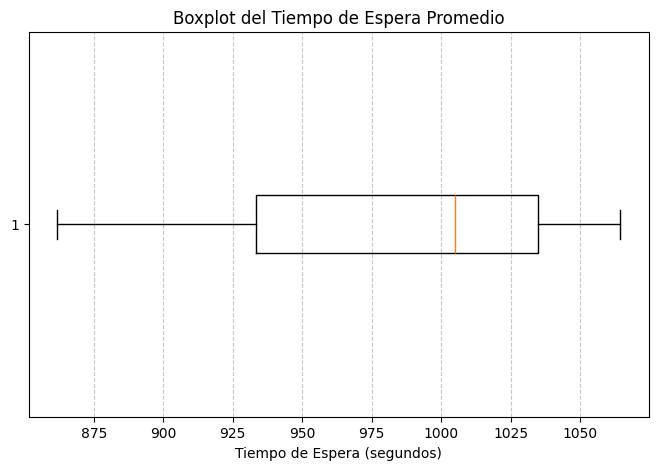

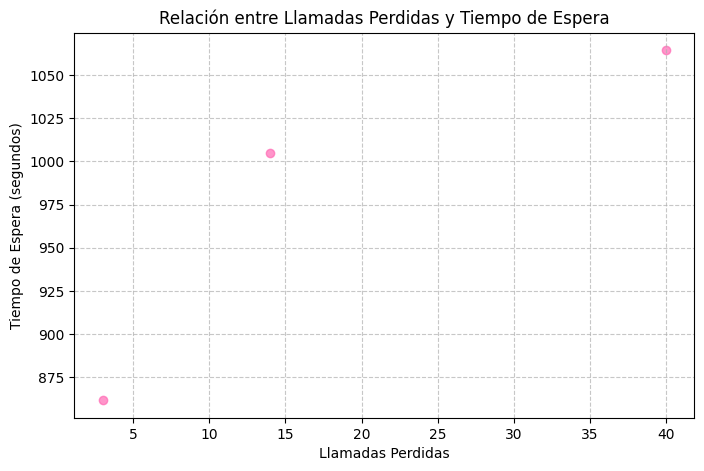

In [31]:
# Crear un boxplot para el tiempo de espera
plt.figure(figsize=(8, 5))
plt.boxplot(group1_operators['avg_wait_time'], vert=False)
plt.xlabel('Tiempo de Espera (segundos)')
plt.title('Boxplot del Tiempo de Espera Promedio')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Crear un diagrama de dispersión de llamadas perdidas vs tiempo de espera
plt.figure(figsize=(8, 5))
plt.scatter(group1_operators['missed_calls'], group1_operators['avg_wait_time'], color='hotpink', alpha=0.7)
plt.xlabel('Llamadas Perdidas')
plt.ylabel('Tiempo de Espera (segundos)')
plt.title('Relación entre Llamadas Perdidas y Tiempo de Espera')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### 📌 **Observaciones:**

- La evaluación en este ***percentil > 75***, arrojó al menos 3 operadores que estan muy por debajo del resto.

***Id de Operadores:***

- 891158.0 → 40 llamadas perdidas y 305 llamadas salientes
- 950444.0 → 14 llamadas perdidas y 95 llamadas salientes
- 957922.0 → 3 llamadas perdidas y 20 llamadas salientes

Tiempo de espera alto y consistente: Todos los valores están entre aproximadamente 875 y 1075 segundos (14 a 17 minutos), indicando una distribución concentrada de los tiempos de espera.

#### 📍 Operadores con un alto ranking de productividad:

In [32]:
display(group2_operators)

,operator_id,total_calls,missed_calls,avg_wait_time,total_call_duration,in_calls,out_calls,missed_calls_ratio,outgoing_calls
9,882476.0,3,0,95.666667,287,3,0,0.0,0.0
17,883898.0,1,0,80.000000,80,0,1,0.0,1.0
20,884294.0,1,0,11.000000,11,1,0,0.0,0.0
26,884524.0,3,0,36.333333,109,3,0,0.0,0.0
32,886674.0,14,0,34.363636,378,11,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1063,968368.0,2,0,46.000000,92,2,0,0.0,0.0
1064,968520.0,10,0,38.000000,76,2,0,0.0,0.0
1066,969268.0,5,0,94.500000,189,0,2,0.0,5.0
1084,971100.0,3,0,86.000000,172,2,0,0.0,0.0


In [33]:
missed_calls_mean = group2_operators['missed_calls_ratio'].mean().round(2)
print('Promedio de tasa de llamadas perdidas (Operadores con un alto ranking de productividad:):',missed_calls_mean)

Promedio de tasa de llamadas perdidas (Operadores con un alto ranking de productividad:): 0.0


In [34]:
wait_time_mean = group2_operators['avg_wait_time'].mean().round(2)
print('Promedio de tiempo de espera promedio (Operadores con un alto ranking de productividad:):',wait_time_mean)

Promedio de tiempo de espera promedio (Operadores con un alto ranking de productividad:): 59.05


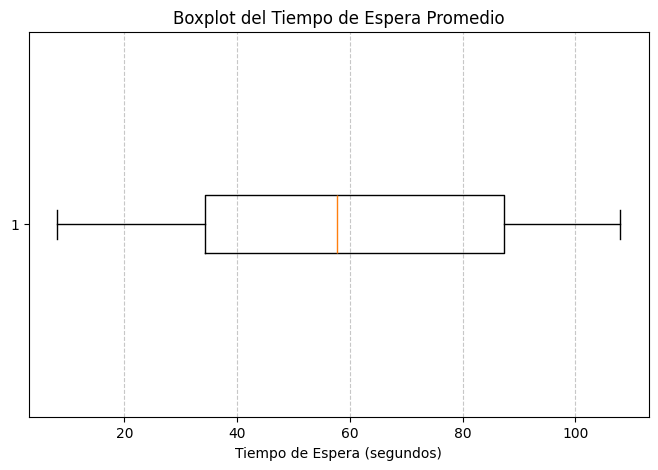

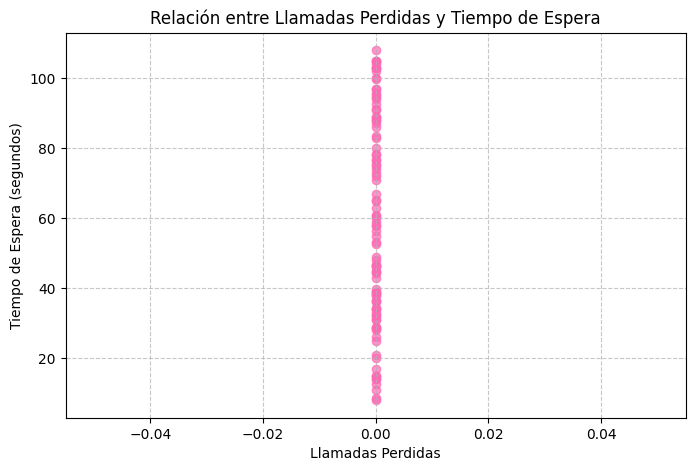

In [35]:
# Crear un boxplot para el tiempo de espera
plt.figure(figsize=(8, 5))
plt.boxplot(group2_operators['avg_wait_time'], vert=False)
plt.xlabel('Tiempo de Espera (segundos)')
plt.title('Boxplot del Tiempo de Espera Promedio')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Crear un diagrama de dispersión de llamadas perdidas vs tiempo de espera
plt.figure(figsize=(8, 5))
plt.scatter(group2_operators['missed_calls'], group2_operators['avg_wait_time'], color='hotpink', alpha=0.7)
plt.xlabel('Llamadas Perdidas')
plt.ylabel('Tiempo de Espera (segundos)')
plt.title('Relación entre Llamadas Perdidas y Tiempo de Espera')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 📌 **Observaciones:**

- La evaluación en este ***percentil < 25***, arrojó al menos 97 operadores que arrojaron un buen desempeño.
- No se observan llamadas perdidas.
- En este caso, la caja está entre aproximadamente 30 y 80 segundos (entre medio minuto y minuto y medio), lo que indica que la mayoría de los tiempos de espera están en ese rango.


***Listado de Operadores de este grupo:***

In [36]:
# Obtener operadores unicos de este grupo
operarators_unique = group2_operators['operator_id'].unique()
print(operarators_unique)

[882476. 883898. 884294. 884524. 886674. 889638. 889640. 890234. 891254.
 891646. 891948. 895170. 895782. 898676. 899892. 903390. 903974. 903976.
 904058. 904372. 905082. 905470. 905478. 907618. 907998. 908130. 908180.
 909894. 909896. 910224. 911152. 911214. 914172. 914266. 917876. 919956.
 919958. 920930. 922154. 923646. 923744. 923944. 924662. 925808. 928022.
 928142. 930582. 930692. 930820. 934424. 935268. 935870. 937428. 937720.
 937880. 939698. 940512. 940514. 940610. 940842. 941816. 942214. 944564.
 944908. 945274. 945710. 946020. 946032. 946468. 947306. 947596. 948282.
 948284. 948524. 950632. 950634. 951118. 952126. 952666. 952954. 952968.
 952982. 953940. 954616. 955086. 955094. 956292. 956664. 962062. 962168.
 963716. 964518. 968368. 968520. 969268. 971100. 973286.]


# 📌 4. Hipótesis a Evaluar

### 📊 Prueba de Mann-Whitney, para evaluar operadores con oportunidades de mejora vs operadores con un alto ranking de productividad.

### 📌 **Observaciones:**

Realizar prueba de Mann-Whitney: En este caso usaremos esta prueba, ya que los valores atípicos no suelen afectar directamente la prueba, no siendo necesario que los datos se distribuyan normalmente. 

<div class="alert alert-block alert-info">
<b>Hipótesis</b>
<b>Nula (H₀): El tiempo de espera promedio son iguales para ambos grupos.
Alternativa (H₁): El tiempo de espera promedio son diferentes. Nivel de significancia: α = 0.05</b> <a class="tocSkip"></a>
</div>

In [37]:
# Extraer los tiempos de espera promedio para ambos grupos
wait_time_group1 = group1_operators['avg_wait_time']
wait_time_group2 = group2_operators['avg_wait_time']


# Realizar la prueba de Mann-Whitney U (no paramétrica)
t_stat, p_value = mannwhitneyu(wait_time_group1,wait_time_group2, alternative='two-sided')

# Resultados
print('Estadística U:', t_stat)
print('Valor p:', p_value)

# Interpretación del resultado
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: El tiempo de espera promedio para ambos son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia estadística para concluir el tiempo de espera promedio son iguales para ambos grupos.")


Estadística U: 291.0
Valor p: 0.003389276171924829
Rechazamos la hipótesis nula: El tiempo de espera promedio para ambos son significativamente diferentes.


### 📌 **Observaciones** 

Si existe un diferencia significativa entre los tiempos de espera de ambos grupos.

### 📊 Prueba de chi-cuadrado para analizar si las llamadas perdidas es significativamente diferente. Extraer llamadas de ambos grupos: Operadores con oportunidades de mejora vs Operadores con un alto ranking de productividad.

In [38]:
# Calcular la suma de llamadas perdidas y atendidas para cada grupo
missed_calls_g1 = group1_operators['missed_calls'].sum()
attended_calls_g1 = group1_operators['total_calls'].sum() - missed_calls_g1

missed_calls_g2 = group2_operators['missed_calls'].sum()
attended_calls_g2 = group2_operators['total_calls'].sum() - missed_calls_g2

# Crear tabla de contingencia
missed_calls_table = pd.DataFrame({
    'Operadores con oportunidades de mejora': [missed_calls_g1, attended_calls_g1],
    'Operadores con alto ranking de productividad': [missed_calls_g2, attended_calls_g2]
}, index=['Llamadas Perdidas', 'Llamadas Atendidas'])

# Prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(missed_calls_table)

# Mostrar los resultados con mejor formato
print(f"📊 Estadístico de Chi-cuadrado: {chi2_stat:.4f}")
print(f"📉 Valor p: {p_value:.6f}")
print(f"📏 Grados de libertad: {dof}")

print('📋 Valores esperados:')
print(pd.DataFrame(expected, index=missed_calls_table.index, columns=missed_calls_table.columns))


📊 Estadístico de Chi-cuadrado: 64.4601
📉 Valor p: 0.000000
📏 Grados de libertad: 1
📋 Valores esperados:
                    Operadores con oportunidades de mejora  \
Llamadas Perdidas                                27.213318   
Llamadas Atendidas                              395.786682   

                    Operadores con alto ranking de productividad  
Llamadas Perdidas                                      29.786682  
Llamadas Atendidas                                    433.213318  


### 📌 **Observaciones**

Como el valor p es mucho menor que 0.05, hay una diferencia significativa en las llamadas perdidas entre los grupos.

# 📌 5. Otros Gráficos a Realizar 

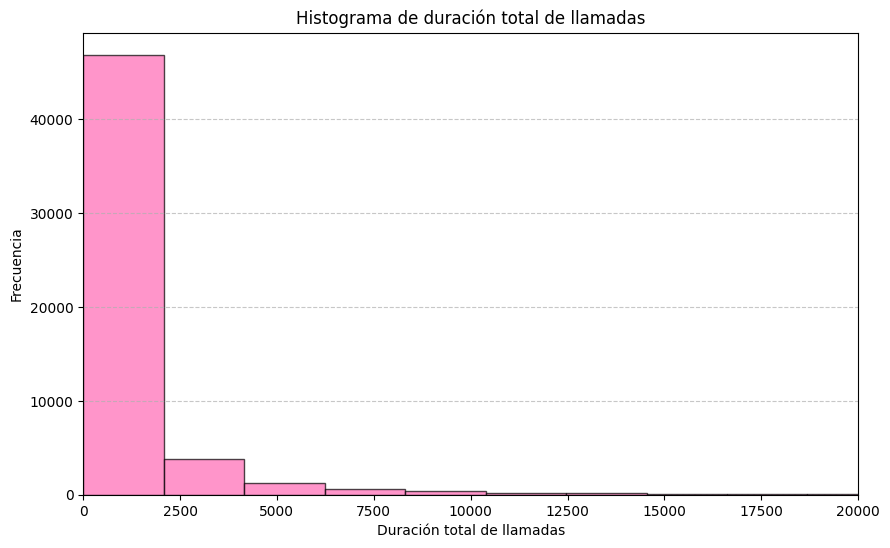

In [39]:
# Seleccionar la columna de duración total de llamadas
durations = merged_data["total_call_duration"]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=80, edgecolor='black', color='hotpink' , alpha=0.7)
plt.xlabel('Duración total de llamadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración total de llamadas')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlim(0, 20000)  # Ajusta según los datos

# Mostrar el histograma
plt.show()

### 📌 **Observaciones**

✅ La mayoría de las llamadas tienen una duración corta

Se observa que la mayor parte de las llamadas están concentradas en el extremo izquierdo del histograma, con duraciones menores a 2500 segundos (~41 minutos).
Esto sugiere que la mayoría de las interacciones con los operadores son relativamente rápidas.

✅ Existen valores extremos de duración de llamada

Aunque la mayoría de las llamadas están por debajo de 2500 segundos, hay llamadas con duraciones mucho mayores.
Algunas llamadas superan los 10,000 - 15,000 segundos (más de 2.5 - 4 horas), lo que podría indicar casos especiales.

✅ La distribución es altamente asimétrica (sesgo positivo)

La forma del histograma muestra una concentración fuerte en los valores más bajos y una cola larga hacia la derecha.
Esto sugiere que la mayoría de las llamadas tienen una duración relativamente corta, pero hay algunas llamadas extremadamente largas que afectan la distribución.

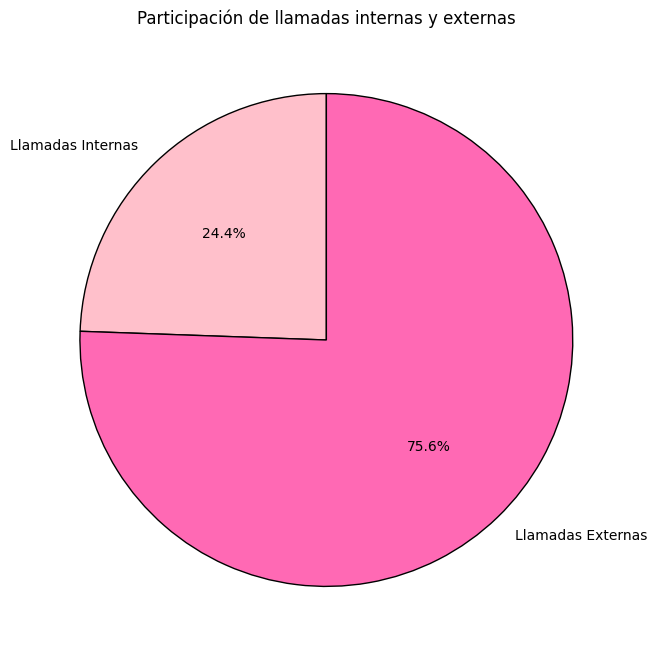

In [46]:
# Calcular la suma total de llamadas internas y externas
total_in_calls = merged_data.loc[merged_data['direction'] == 'in', 'calls_count'].sum()
total_out_calls = merged_data.loc[merged_data['direction'] == 'out', 'calls_count'].sum()

# Definir los datos para el gráfico
sizes = [total_in_calls, total_out_calls]
labels = ['Llamadas Internas', 'Llamadas Externas']
colors = ['pink', 'hotpink']  # Definir los colores

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Participación de llamadas internas y externas')

# Mostrar el gráfico
plt.show()


In [49]:
print('Total de Llamadas Internas:',total_in_calls)
print('Total de Llamadas Externas:',total_out_calls)

Total de Llamadas Internas: 216635
Total de Llamadas Externas: 669886


### 📌 **Observaciones**

✅ Las llamadas externas representan la mayor parte del tráfico.

El 75.6% de las llamadas son externas, lo que indica que la mayoría de la comunicación se realiza con clientes o contactos fuera de la organización.
Esto puede sugerir que el centro de llamadas se enfoca en atención al cliente, ventas o soporte técnico externo.

✅ Las llamadas internas no representan una parte tan grande como las llamadas externas. 

Las llamadas internas constituyen el 24.4% del total.


# 📌 6.Conclusiones

📝 **Conclusiones:**

- Hay una diferencia significativa entre los operadores de alto rendimiento y los operadores con oportunidades de mejora.
- La prueba de Mann-Whitney muestra que los tiempos de espera entre ambos grupos son estadísticamente diferentes.
- La prueba de Chi-cuadrado indica una diferencia significativa en la cantidad de llamadas perdidas entre ambos grupos.
- Se observó que la mayor parte de las llamadas están concentradas en el extremo izquierdo del histograma, con duraciones menores a 2500 segundos (~41 minutos). Esto sugiere que la mayoría de las interacciones con los operadores son relativamente rápidas.
- El 75.6% de las llamadas son externas, lo que indica que la mayoría de la comunicación se realiza con clientes o contactos fuera de la organización. Esto puede sugerir que el centro de llamadas se enfoca en atención al cliente, ventas o soporte técnico externo.
- Las llamadas internas solo constituyen el 24.4% del total.

  
✅ Operadores con un alto ranking de productividad:

- Los operadores con alta productividad manejan mejor el tiempo y la tasa de llamadas perdidas.
- La tasa de llamadas perdidas en este grupo está por debajo del percentil 25.
- El tiempo de espera promedio es significativamente menor, lo que mejora la experiencia del cliente.
- 97 operadores presentan un desempeño óptimo con tiempos de espera entre 30 y 80 segundos.

✅ Operadores con oportunidades de mejora:

- Se identificaron 3 operadores con baja productividad.
- Sus tiempos de espera están consistentemente entre 875 y 1075 segundos (14 a 17 minutos).
- Presentan una tasa de llamadas perdidas por encima del percentil 75, lo que indica un bajo rendimiento en la gestión del tiempo.
    - Operador 891158.0: 40 llamadas perdidas, 305 llamadas salientes.
    - Operador 950444.0: 14 llamadas perdidas, 95 llamadas salientes.
    - Operador 957922.0: 3 llamadas perdidas, 20 llamadas salientes.



📝 **Sugerencias para la toma de decisiones:**

- Optimizar la gestión de llamadas y tiempos de espera.

✅ Acciones para operadores con un alto ranking de productividad:

- Identificar las estrategias utilizadas por los 97 operadores de alto rendimiento y aplicarlas a otros grupos.

✅ Acciones para operadores con oportunidades de mejora:

- Implementar un sistema de monitoreo en tiempo real para alertar sobre tiempos de espera prolongados.
- Implementar programas de capacitación basados en el modelo de operadores exitosos.
- Revisar las causas de los altos tiempos de espera (problemas en el sistema, sobrecarga de trabajo, falta de capacitación, etc.).
- Diseñar un plan de mejora personalizado para los tres operadores con bajo rendimiento.